In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [ ]:
# Importamos los datos de csv en un dataframe de pandas
data= pd.read_csv("usuarios-twitter.csv")

# Columnas del dataframe
data.info()

# Ejemplo de los datos
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
X = data[['co', 'ag', 'ne']]
Y = data[['categoria']]

In [ ]:
distortions = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

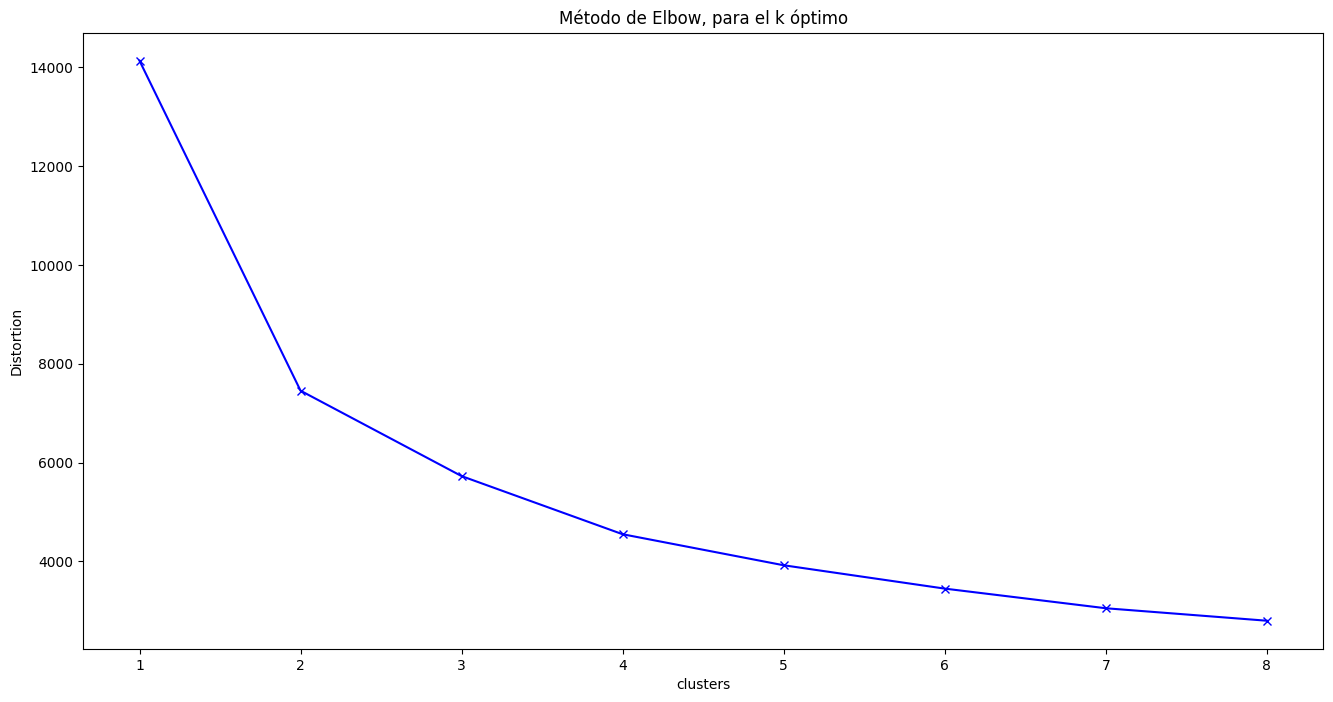

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('Método de Elbow, para el k óptimo')
plt.show()

# Eleccion del número de clusters:
En base a la gráfica del codo, se decidió que el número de clusters óptimo es 3, porqué apartir de más cluster no se generan más cambios significativos en la disminución de la distorción.

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

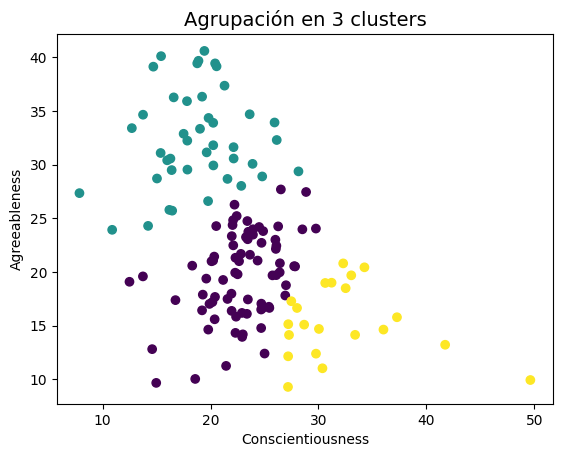

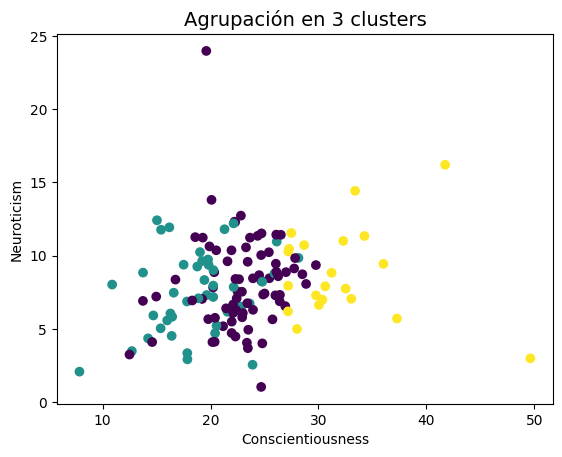

In [ ]:
Y2 = kmeanModel.predict(X)
plt.figure()
plt.title('Agrupación en 3 clusters', fontsize=14)
plt.xlabel('Conscientiousness')
plt.ylabel('Agreeableness')
plt.scatter(X['co'], X['ag'], c=Y2);
plt.figure()
plt.title('Agrupación en 3 clusters', fontsize=14)
plt.xlabel('Conscientiousness')
plt.ylabel('Neuroticism')
plt.scatter(X['co'], X['ne'], c=Y2);

## El modelo divide 3 cluster.

- **Amarillos:** Este grupo se caracteriza por tener "alto orden", tienen "baja empatía" y "y algo de bajo nerviosismo". Puede representar un grupo de individuos con un alto nivel autodisciplina e individualista.

- **Verdes:** Este cluster se caracteriza por tener "alta empatía", tienden a tener "bajo orden" y "medio-bajo nerviosismo". Esto podría representar un grupo de individuos que tienden ser mas conectados con grupos pero es poco disiplinado con si mismo.

- **Morado:** En este grupo, se observa "media-baja empatía", "medio-bajo orden" y "medio-bajo nerviosismo". Esto indica que los puntos en este cluster no muestran valores extremos en ninguna de las tres características. Este grupo podría representar una población mas general, que no muestra caracteristica particular en las variables usadas, lo que impide agregarla en en otros cluster.

Podemos ver que la caracteristica Neuroricism aporta poca o nula informacion a la hora de separar los cluster, a diferencia de Conscientiousness y Agreeableness que separan claramente los datos.